In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np

In [34]:
df_trem_zero = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv') 
df_trem_zero.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(df_trem.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
print(df_trem.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
missing_data = df_trem.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_percent = (missing_data / len(df_trem)) * 100
missing_df = pd.DataFrame({'Total Missing': missing_data, 'Percent': missing_percent})
print(missing_df.sort_values(by='Percent', ascending=False))

              Total Missing    Percent
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageFinish             81   5.547945
GarageQual               81   5.547945
GarageCond               81   5.547945
BsmtFinType2             38   2.602740
BsmtExposure             38   2.602740
BsmtFinType1             37   2.534247
BsmtCond                 37   2.534247
BsmtQual                 37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493


In [7]:
df_trem = df_trem.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [8]:
for col in ('FireplaceQu', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_trem[col] = df_trem[col].fillna('None')

In [9]:
df_trem['GarageYrBlt'] = df_trem['GarageYrBlt'].fillna(0)

df_trem['MasVnrArea'] = df_trem['MasVnrArea'].fillna(0)

df_trem['LotFrontage'] = df_trem['LotFrontage'].fillna(df_trem['LotFrontage'].median())

df_trem['Electrical'] = df_trem['Electrical'].fillna(df_trem['Electrical'].mode()[0])

In [10]:
df_trem.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
categorical_cols = df_trem.select_dtypes(include='object').columns
print(categorical_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [14]:
import pandas as pd

# Certifique-se de que df_trem está carregado aqui, por exemplo:
# df_trem = pd.read_csv('seu_arquivo.csv')

# Obter todas as colunas do tipo 'object'
categorical_cols = df_trem.select_dtypes(include='object').columns

# Preparar dados para a tabela
data = []
for col in categorical_cols:
    unique_values = df_trem[col].unique()
    if len(unique_values) > 5: # Mostrar até 5 valores únicos, depois indicar que há mais
        display_values = ', '.join(map(str, unique_values[:5])) + ', ...'
    else:
        display_values = ', '.join(map(str, unique_values))
    data.append({'Column Name': col, 'Number of Unique Values': len(unique_values), 'Sample Unique Values': display_values})

# Criar um DataFrame
unique_values_df = pd.DataFrame(data)

# Imprimir o DataFrame em formato de tabela
print("Amostra de valores únicos para cada coluna 'object' (formato de tabela):")
print(unique_values_df.to_string())

Amostra de valores únicos para cada coluna 'object' (formato de tabela):
      Column Name  Number of Unique Values                              Sample Unique Values
0        MSZoning                        5                           RL, RM, C (all), FV, RH
1          Street                        2                                        Pave, Grvl
2        LotShape                        4                                Reg, IR1, IR2, IR3
3     LandContour                        4                                Lvl, Bnk, Low, HLS
4       Utilities                        2                                    AllPub, NoSeWa
5       LotConfig                        5                 Inside, FR2, Corner, CulDSac, FR3
6       LandSlope                        3                                     Gtl, Mod, Sev
7    Neighborhood                       25  CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...
8      Condition1                        9              Norm, Feedr, PosN, Artery, RRAe, .

In [15]:
# Mapeamento para LotShape
lot_shape_map = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
df_trem['LotShape'] = df_trem['LotShape'].replace(lot_shape_map)

# Mapeamento para Utilities
utilities_map = {'AllPub': 2, 'NoSeWa': 1}
df_trem['Utilities'] = df_trem['Utilities'].replace(utilities_map)

# Mapeamento para LandSlope
land_slope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
df_trem['LandSlope'] = df_trem['LandSlope'].replace(land_slope_map)

# Mapeamento para qualidades/condições gerais (Ex, Gd, TA, Fa, Po, None)
# Note que 'None' é mapeado para 0 onde a ausência significa a pior categoria ou não aplicável
quality_cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}

df_trem['ExterQual'] = df_trem['ExterQual'].replace(quality_cond_map)
df_trem['ExterCond'] = df_trem['ExterCond'].replace(quality_cond_map)
df_trem['BsmtQual'] = df_trem['BsmtQual'].replace(quality_cond_map)
df_trem['BsmtCond'] = df_trem['BsmtCond'].replace(quality_cond_map)
df_trem['HeatingQC'] = df_trem['HeatingQC'].replace(quality_cond_map)
df_trem['KitchenQual'] = df_trem['KitchenQual'].replace(quality_cond_map)
df_trem['FireplaceQu'] = df_trem['FireplaceQu'].replace(quality_cond_map)
df_trem['GarageQual'] = df_trem['GarageQual'].replace(quality_cond_map)
df_trem['GarageCond'] = df_trem['GarageCond'].replace(quality_cond_map)

# Mapeamento para BsmtExposure
bsmt_exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
df_trem['BsmtExposure'] = df_trem['BsmtExposure'].replace(bsmt_exposure_map)

# Mapeamento para BsmtFinType1 e BsmtFinType2
bsmt_fin_type_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
df_trem['BsmtFinType1'] = df_trem['BsmtFinType1'].replace(bsmt_fin_type_map)
df_trem['BsmtFinType2'] = df_trem['BsmtFinType2'].replace(bsmt_fin_type_map)

# Mapeamento para Functional
functional_map = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}
df_trem['Functional'] = df_trem['Functional'].replace(functional_map)

# Mapeamento para GarageFinish
garage_finish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
df_trem['GarageFinish'] = df_trem['GarageFinish'].replace(garage_finish_map)

# Mapeamento para PavedDrive
paved_drive_map = {'Y': 2, 'P': 1, 'N': 0}
df_trem['PavedDrive'] = df_trem['PavedDrive'].replace(paved_drive_map)

# Mapeamento para CentralAir
central_air_map = {'Y': 1, 'N': 0}
df_trem['CentralAir'] = df_trem['CentralAir'].replace(central_air_map)

# Mapeamento para Street
street_map = {'Pave': 1, 'Grvl': 0}
df_trem['Street'] = df_trem['Street'].replace(street_map)

/tmp/ipykernel_36/1392181267.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_trem['LotShape'] = df_trem['LotShape'].replace(lot_shape_map)
/tmp/ipykernel_36/1392181267.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_trem['Utilities'] = df_trem['Utilities'].replace(utilities_map)
/tmp/ipykernel_36/1392181267.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the futur

In [16]:
import pandas as pd

# Crie uma lista com os nomes das colunas nominais
nominal_cols = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

# Aplique One-Hot Encoding
df_trem = pd.get_dummies(df_trem, columns=nominal_cols, drop_first=True)

In [17]:
df_trem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 196 entries, Id to SaleCondition_Partial
dtypes: bool(138), float64(3), int64(55)
memory usage: 858.4 KB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


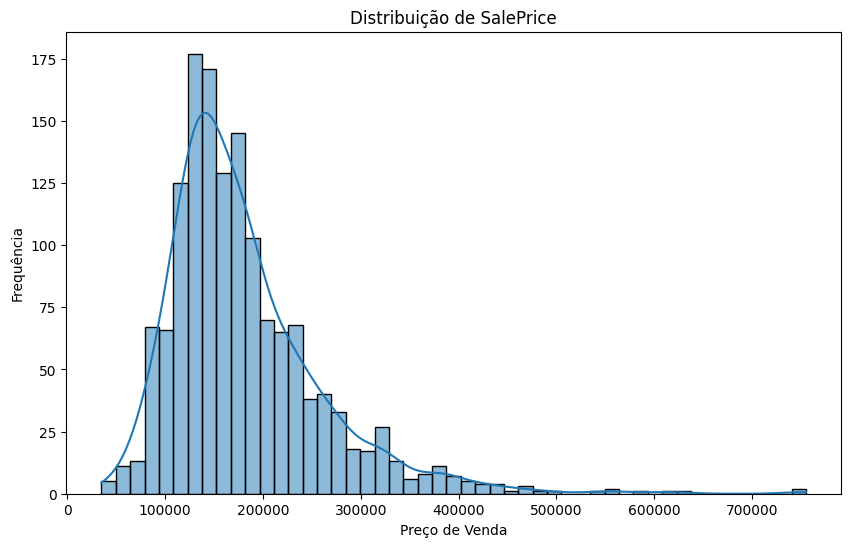

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_trem['SalePrice'], kde=True)
plt.title('Distribuição de SalePrice')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()

In [19]:
import numpy as np

# Aplicar a transformação logarítmica (log1p para lidar com 0, se houver, embora SalePrice não tenha)
df_trem['SalePrice'] = np.log1p(df_trem['SalePrice'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


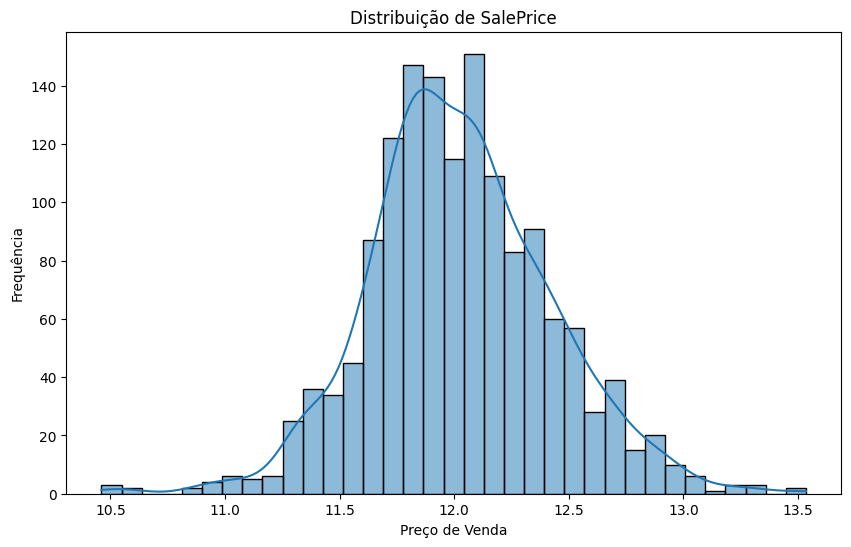

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_trem['SalePrice'], kde=True)
plt.title('Distribuição de SalePrice')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np # Importe numpy também se ainda não o fez

# Verifique novamente se a transformação logarítmica foi aplicada ao SalePrice
# Se não, rode:
# df_trem['SalePrice'] = np.log1p(df_trem['SalePrice'])

# Separar Features (X) e Variável Alvo (y)
X = df_trem.drop('SalePrice', axis=1) # Remove a coluna SalePrice das features
y = df_trem['SalePrice']             # SalePrice é a sua variável alvo

# Dividir os dados em conjuntos de treino e teste
# Usaremos 80% para treino e 20% para teste, com um random_state para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")

Formato de X_train: (1168, 195)
Formato de X_test: (292, 195)
Formato de y_train: (1168,)
Formato de y_test: (292,)


In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Inicializar o modelo XGBoost Regressor
# Começando com alguns parâmetros razoáveis.
# n_estimators: número de rodadas de boosting (árvores)
# learning_rate: taxa de aprendizado
# random_state: para reprodutibilidade
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# 2. Treinar o modelo
print("Treinando o modelo XGBoost...")
xgb_model.fit(X_train, y_train)
print("Treinamento concluído.")

# 3. Fazer previsões no conjunto de teste (as previsões estarão na escala logarítmica)
y_pred_log = xgb_model.predict(X_test)

# 4. Converter as previsões e os valores reais de volta para a escala original de preço
# Usamos np.expm1 para reverter o np.log1p
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# 5. Avaliar o modelo
# Calcular o RMSE (Root Mean Squared Error) na escala original
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
# Calcular o R-squared (R²)
r2 = r2_score(y_test_original, y_pred_original)

print(f"\nRMSE (Root Mean Squared Error) no conjunto de teste (escala original): {rmse:.2f}")
print(f"R-squared (R²) no conjunto de teste (escala original): {r2:.2f}")

Treinando o modelo XGBoost...
Treinamento concluído.

RMSE (Root Mean Squared Error) no conjunto de teste (escala original): 27229.16
R-squared (R²) no conjunto de teste (escala original): 0.90


In [30]:
import pandas as pd

# Carregue o arquivo de teste no DataFrame df_teste1
df_teste1 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Em seguida, você pode visualizá-lo:
print(df_teste1.head())

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [32]:
import pandas as pd

# Carregue o arquivo de teste no DataFrame df_teste1
df_amostra1 = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

# Em seguida, você pode visualizá-lo:
print(df_amostra1.head())

     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977


In [36]:
import pandas as pd
import numpy as np

# Certifique-se de que df_teste1 está carregado
# df_teste1 = pd.read_csv('test.csv') # Se não estiver, descomente e carregue-o aqui

# Certifique-se de que df_trem_zero está carregado (o df de treino original sem tratamento)
# df_trem_zero = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv') # Se não estiver, descomente e carregue-o aqui

# IMPORTANTE: X_train (seu conjunto de features de treino já pré-processado) e xgb_model (seu modelo treinado)
# devem estar definidos em seu ambiente.

# Passo 1: Guardar os IDs para o arquivo de submissão final
test_ids = df_teste1['Id']

# Passo 2: Remover as mesmas colunas que foram removidas do treino
df_teste1 = df_teste1.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, errors='ignore')

# Passo 3: Preencher valores ausentes para colunas categóricas com 'None'
for col in ('FireplaceQu', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    if col in df_teste1.columns:
        df_teste1[col] = df_teste1[col].fillna('None')

# Passo 4: Preencher valores ausentes para colunas numéricas
# Use as estatísticas do df_trem_zero (o treino original)
if 'GarageYrBlt' in df_teste1.columns:
    df_teste1['GarageYrBlt'] = df_teste1['GarageYrBlt'].fillna(0) # 0 para ano de construção de garagem ausente

if 'MasVnrArea' in df_teste1.columns:
    df_teste1['MasVnrArea'] = df_teste1['MasVnrArea'].fillna(0) # 0 para área de alvenaria folheada ausente

if 'LotFrontage' in df_teste1.columns:
    # Use a mediana de LotFrontage do df_trem_zero (treino original)
    df_teste1['LotFrontage'] = df_teste1['LotFrontage'].fillna(df_trem_zero['LotFrontage'].median())

if 'Electrical' in df_teste1.columns:
    # Use a moda de Electrical do df_trem_zero (treino original)
    df_teste1['Electrical'] = df_teste1['Electrical'].fillna(df_trem_zero['Electrical'].mode()[0])

# Preencher outras colunas categóricas que possam ter NaNs no teste, usando a moda do treino original
for col in ['MSZoning', 'SaleType', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'Utilities']:
    if col in df_teste1.columns and df_teste1[col].isnull().any(): # Verifica se tem NaN e a coluna existe
        # Assegura que estamos pegando a moda da coluna original 'object' type do df_trem_zero
        df_teste1[col] = df_teste1[col].fillna(df_trem_zero[col].mode()[0])

# Passo 5: Mapeamento de Colunas Ordinais (Copie e cole TODOS os seus mapeamentos aqui)
# Use 'df_teste1' como o DataFrame para aplicar os replace
lot_shape_map = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}
df_teste1['LotShape'] = df_teste1['LotShape'].replace(lot_shape_map)

utilities_map = {'AllPub': 2, 'NoSeWa': 1}
df_teste1['Utilities'] = df_teste1['Utilities'].replace(utilities_map)

land_slope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
df_teste1['LandSlope'] = df_teste1['LandSlope'].replace(land_slope_map)

quality_cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
df_teste1['ExterQual'] = df_teste1['ExterQual'].replace(quality_cond_map)
df_teste1['ExterCond'] = df_teste1['ExterCond'].replace(quality_cond_map)
df_teste1['BsmtQual'] = df_teste1['BsmtQual'].replace(quality_cond_map)
df_teste1['BsmtCond'] = df_teste1['BsmtCond'].replace(quality_cond_map)
df_teste1['HeatingQC'] = df_teste1['HeatingQC'].replace(quality_cond_map)
df_teste1['KitchenQual'] = df_teste1['KitchenQual'].replace(quality_cond_map)
df_teste1['FireplaceQu'] = df_teste1['FireplaceQu'].replace(quality_cond_map)
df_teste1['GarageQual'] = df_teste1['GarageQual'].replace(quality_cond_map)
df_teste1['GarageCond'] = df_teste1['GarageCond'].replace(quality_cond_map)

bsmt_exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
df_teste1['BsmtExposure'] = df_teste1['BsmtExposure'].replace(bsmt_exposure_map)

bsmt_fin_type_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
df_teste1['BsmtFinType1'] = df_teste1['BsmtFinType1'].replace(bsmt_fin_type_map)
df_teste1['BsmtFinType2'] = df_teste1['BsmtFinType2'].replace(bsmt_fin_type_map)

functional_map = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}
df_teste1['Functional'] = df_teste1['Functional'].replace(functional_map)

garage_finish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
df_teste1['GarageFinish'] = df_teste1['GarageFinish'].replace(garage_finish_map)

paved_drive_map = {'Y': 2, 'P': 1, 'N': 0}
df_teste1['PavedDrive'] = df_teste1['PavedDrive'].replace(paved_drive_map)

central_air_map = {'Y': 1, 'N': 0}
df_teste1['CentralAir'] = df_teste1['CentralAir'].replace(central_air_map)

street_map = {'Pave': 1, 'Grvl': 0}
df_teste1['Street'] = df_teste1['Street'].replace(street_map)


# Passo 6: One-Hot Encoding para colunas nominais
nominal_cols = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

df_teste1 = pd.get_dummies(df_teste1, columns=nominal_cols, drop_first=True)


# Passo 7: Alinhar as colunas do df_teste1 com as colunas de X_train
# Remova a coluna 'Id' do df_teste1 antes de alinhar, pois ela não estava em X_train
if 'Id' in df_teste1.columns:
    df_teste1 = df_teste1.drop('Id', axis=1)

# IMPORTANTE: X_train deve ser o seu conjunto de treino já pré-processado (sem SalePrice e com OHE)
# Alinhar as colunas do df_teste1 com as colunas de X_train
# Isso adicionará colunas que estão em X_train mas não em df_teste1 (com 0)
# e removerá colunas que estão em df_teste1 mas não em X_train
df_teste_final = df_teste1.reindex(columns=X_train.columns, fill_value=0)


print("Pré-processamento do df_teste1 concluído. Verifique o info():")
print(df_teste_final.info())
print(f"Formato final do df_teste_final: {df_teste_final.shape}")

# Parte final: Fazer previsões e gerar o arquivo de submissão
# Certifique-se de que seu 'xgb_model' já foi treinado e está disponível
predictions_log = xgb_model.predict(df_teste_final)
predictions_original = np.expm1(predictions_log) # Reverter a transformação logarítmica

submission = pd.DataFrame({'Id': test_ids, 'SalePrice': predictions_original})
submission.to_csv('submission.csv', index=False)

print("\nArquivo 'submission.csv' gerado com sucesso!")
print("Agora você pode enviar este arquivo no Kaggle!")

Pré-processamento do df_teste1 concluído. Verifique o info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 195 entries, Id to SaleCondition_Partial
dtypes: bool(124), float64(11), int64(60)
memory usage: 986.1 KB
None
Formato final do df_teste_final: (1459, 195)

Arquivo 'submission.csv' gerado com sucesso!
Agora você pode enviar este arquivo no Kaggle!


/tmp/ipykernel_36/3446932713.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_teste1['LotShape'] = df_teste1['LotShape'].replace(lot_shape_map)
/tmp/ipykernel_36/3446932713.py:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_teste1['Utilities'] = df_teste1['Utilities'].replace(utilities_map)
/tmp/ipykernel_36/3446932713.py:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to

In [39]:
submission.info

<bound method DataFrame.info of         Id      SalePrice
0     1461  121270.101562
1     1462  156986.656250
2     1463  192492.031250
3     1464  188738.812500
4     1465  207418.859375
...    ...            ...
1454  2915   85972.585938
1455  2916   85092.117188
1456  2917  171674.109375
1457  2918  116288.320312
1458  2919  217354.687500

[1459 rows x 2 columns]>

In [38]:
print(df_amostra1.head())

     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977
